# euporie

Welcome to `euporie`, a terminal based interactive development environment for Jupyter notebooks.

- Use `Up` and `Down` to navigate, `Enter` to edit a cell, and `Esc Esc` to stop editing a cell
- Use `Ctrl+e` to execute or render a cell, or `Ctrl+r` to run a cell and select the next cell
- You can view all keyboard shortcuts in the `Help` menu
- The online documentation is available at [https://euporie.readthedocs.io](https://euporie.readthedocs.io)
---

## Markdown Cells

`euporie` will render markdown cells in notebooks, including elements such as:

Code blocks:

```python
def hello():
    print("Hello world!")
```

Tables:

| Item         | Can `euporie` display it? |
|-------------:|:--------------------------|
| **Markdown** | Yes
| **Tables**   | Yes
| **LaTeX**    | Yes

LaTex maths equations:

$$
s = ut + \frac{1}{2}at^2
$$
$$
x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}
$$
$$
f = \sum_{i = 0}^{\infty} \frac{f^{(i)}(0)}{i!} x^i
$$

> Quote blocks

- Lists

*Inline* **styles** and `inline code`

## Cell Output

`Euporie` will also render the output of code cells.

This includes displaying Images, HTML, SVG, Markdown, LaTeX and ANSI text:

In [1]:
display({"text/markdown": "Regular *Italic* **Bold**"}, raw=True)

Regular *Italic* **Bold**

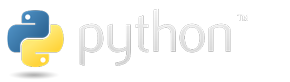

In [2]:
from IPython.display import *
import urllib.request
data = urllib.request.urlopen("https://www.python.org/static/img/python-logo.png").read()
Image(data)

This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [3]:
import pandas as pd
import numpy as np

x = np.arange(20_000)

df = pd.DataFrame(
    {
        col: np.random.beta(i+1, 3, x.shape)
        for col, i in zip("abcd", [0, 2, 4, 6])
    },
    index = x,
)
df#.head()

,a,b,c,d
0,0.444948,0.926781,0.595965,0.569567
1,0.001776,0.741923,0.745243,0.764558
2,0.580319,0.480798,0.225887,0.821960
3,0.361174,0.553646,0.635718,0.494219
4,0.021670,0.662095,0.517518,0.703006
...,...,...,...,...
19995,0.099640,0.182113,0.558024,0.865261
19996,0.588418,0.335961,0.843030,0.631858
19997,0.539659,0.428418,0.433103,0.789560
19998,0.088412,0.272005,0.702432,0.705069


`euporie` can render images using Sixel graphics if your terminal supports it. Otherwise it will fall back to using character-based terminal graphics.

This means you can produce plots with `matplotlib` and `euporie` will display them in the best way it can:

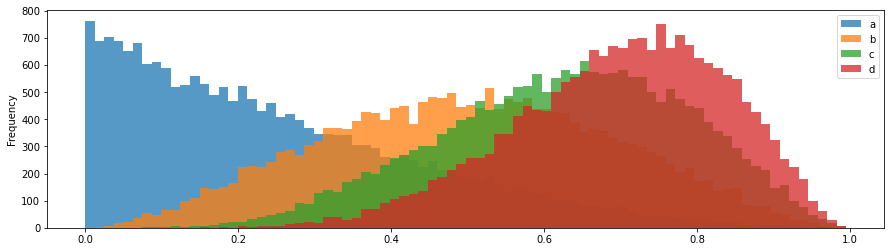

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 4), facecolor="#FFF")
df.plot.hist(ax=ax, bins=80, alpha=0.75)
plt.show()

If your terminal does not support graphics, the excellent `plotext` library works very well with euporie:

In [5]:
import plotext as plt

plt.clear_figure()
plt.plot_size(100, 15)
for name, col in df.items():
    plt.hist(col.values, 80, label=name)
plt.title("Histogram Plot")
plt.show()

                                  Histogram Plot                                
     ┌─────────────────────────────────────────────────────────────────────────┐
742.0┤ ▖▖▖ a                                                                   │
     │ ▖▖▖ b                                                 ▄                 │
618.3┤ ▖▖▖ c █▌                                       ▄ ▄▟█▖██▟▙▄              │
494.7┤ ▖▖▖ d █▙███▄▖ ▄                  ▗▖  ▄▗▄▄▟█▄██████████████▙▄            │
     │       ██████████▟█       ▗▄▖▄▄▐█████▙█████████████████████████▖         │
371.0┤█████████████████████▙▄▄▄▟██████████████████████████████████████▙        │
     │██████████████████████████████████████████████████████████████████       │
247.3┤███████████████████████████████████████████████████████████████████▙     │
123.7┤████████████████████████████████████████████████████████████████████▄▖   │
     │█████████████████████████████████████████████████████████████████████▙▖  │
  0.0┤██████████████████████

It can also display SVG output:

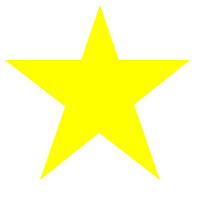

In [6]:
from IPython.display import SVG
SVG('<svg width="200" height="200"><polygon points="100,5 40,180 190,60 5,60 160,180" fill="yellow" /></svg>')

`euoporie` can response to requests for user input from the kernel (press enter to send your input):

In [7]:
name = input("Enter your name:")
print(f"Hello {name}")

Hello Josiah


`euporie` supporst ANSI output, so  works with libraries like `tqdm` and `rich`:

In [8]:
import time
from tqdm import tqdm

for i in tqdm(range(20), ncols=100):
    time.sleep(0.2)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.95it/s]


In [9]:
from rich.console import Console
from rich.progress import track
console = Console(force_jupyter=False, force_terminal=True)
for _ in track(range(20), console=console):
    time.sleep(0.2)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00


In [10]:
!ls -l --color=always

drwxr-xr-x josiah josiah 4.0 KB Sun Jan 23 14:50:14 2022  __pycache__
.rw-r--r-- josiah josiah 1.5 KB Tue Feb  1 11:58:20 2022  CHANGELOG.rst
drwxr-xr-x josiah josiah 4.0 KB Thu Jan 27 14:20:59 2022  dist
drwxr-xr-x josiah josiah 4.0 KB Tue Feb  1 22:49:44 2022  docs
drwxr-xr-x josiah josiah 4.0 KB Thu Feb  3 11:09:00 2022  euporie
drwxr-xr-x josiah josiah 4.0 KB Fri Jan 21 17:12:51 2022  euporie_textual
.rw-r--r-- josiah josiah 1.1 KB Fri May 21 07:59:37 2021  LICENSE
.rw-r--r-- josiah josiah  12 MB Thu Feb  3 11:11:17 2022  log.log
drwxr-xr-x josiah josiah 4.0 KB Wed Jun 30 09:24:27 2021  media
.rw-r--r-- josiah josiah 4.0 KB Fri Jan 21 16:18:39 2022  noxfile.py
.rw-r--r-- josiah josiah 169 KB Tue Feb  1 11:58:20 2022  poetry.lock
.rw-r--r-- josiah josiah 4.0 KB Thu Jun 17 21:30:37 2021  publish.log
.rw-r--r-- josiah josiah 2.0 KB Thu Feb  3 10:08:04 2022  pyproject.toml
.rw-r--r-- josiah josiah 2.1 KB Thu Feb  3 11:09:00 2022  README.rst
drwxr-xr-x josiah josiah 4.0 KB

---

If you like `euporie`, please [star it on GitHub](https://github.com/joouha/euporie/)

⭐ https://github.com/joouha/euporie/